< [Traitement de données](02-traitement-donnees.ipynb) | [Contents](index.ipynb) | [Analyse statistique](04-statistiques.ipynb) >

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import mplleaflet as mpll

In [2]:
accidents = gpd.read_file("donnees/accidents-geobase/accidents_2018.shp")
accidents = accidents[~accidents.geometry.isnull()]
accidents.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 21381 entries, 0 to 21384
Data columns (total 70 columns):
NO_SEQ_COL    21381 non-null object
JR_SEMN_AC    21381 non-null object
DT_ACCDN      21381 non-null object
CD_MUNCP      21377 non-null float64
NO_CIVIQ_A    8868 non-null float64
SFX_NO_CIV    49 non-null object
BORNE_KM_A    7 non-null float64
RUE_ACCDN     20257 non-null object
TP_REPRR_A    13625 non-null float64
ACCDN_PRES    14465 non-null object
NB_METRE_D    4394 non-null float64
CD_GENRE_A    20662 non-null float64
CD_SIT_PRT    474 non-null float64
CD_ETAT_SU    20519 non-null float64
CD_ECLRM      20572 non-null float64
CD_ENVRN_A    20829 non-null float64
NO_ROUTE      77 non-null float64
CD_CATEG_R    20930 non-null float64
CD_ETAT_CH    5832 non-null float64
CD_ASPCT_R    20729 non-null float64
CD_LOCLN_A    20015 non-null float64
CD_POSI_AC    5397 non-null float64
CD_CONFG_R    19842 non-null float64
CD_ZON_TRA    481 non-null float64
CD_PNT_CDR    14 no

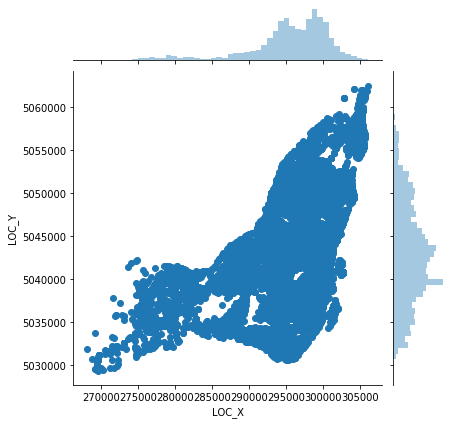

In [11]:
sns.jointplot(x="LOC_X", y="LOC_Y", data=accidents)

In [14]:
#accidents#
fig, ax = plt.subplots(1, figsize=(6, 6))
wgsAccidents = gpd.read_file("donnees/accidents-geobase/accidents0.shp").to_crs(epsg = 4326)
wgsAccidents.plot(ax=ax)
mpll.display(fig=fig)

# Mesures de centralité

In [57]:
from pointpats import PointPattern
from pointpats.centrography import hull, mbr, mean_center, weighted_mean_center, manhattan_median, std_distance,euclidean_median,ellipse
pp = PointPattern(accidents[['LOC_X','LOC_Y']])
pp.summary()
pp10 = PointPattern(pp.points[::10])

Point Pattern
21381 points
Bounding rectangle [(268161.55812,5029325.1705), (306077.46146,5062512.1035)]
Area of window: 1258312543.7790642
Intensity estimate for window: 1.6991803908897612e-05
              x             y
0  277363.60800  5.034994e+06
1  274551.05174  5.033633e+06
2  277946.00000  5.035171e+06
3  276486.60700  5.038090e+06
4  279219.92101  5.040510e+06


[ 295248.31891199 5042923.71750606]


(266265.762953, 307973.256627, 5027665.82385, 5064171.45015)

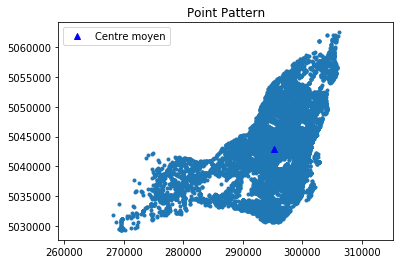

In [5]:
mc = mean_center(pp.points)
print(mc)
pp.plot()
plt.plot(mc[0], mc[1], 'b^', label='Centre moyen')
plt.legend(numpoints=1)
plt.axis('equal')

[ 295110.32998692 5043326.28947861]


(5040923.717506057, 5044923.717506057)

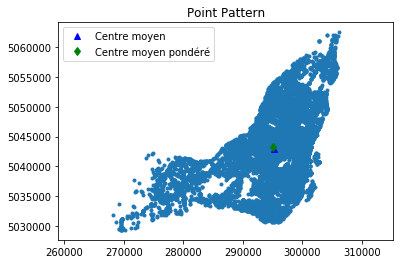

<Figure size 432x288 with 0 Axes>

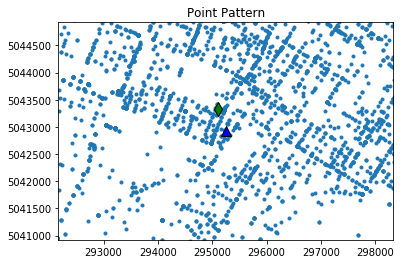

In [8]:
# centre moyen pondéré
wmc = weighted_mean_center(pp.points, accidents['NB_BLESSES']+accidents['NB_MORTS']) 
# accidents[['NB_BLESSES','NB_MORTS']].sum(axis=1)
print(wmc)
pp.plot() #use class method "plot" to visualize point pattern
plt.plot(mc[0], mc[1], 'b^', label='Centre moyen') 
plt.plot(wmc[0], wmc[1], 'gd', label='Centre moyen pondéré')
plt.legend(numpoints=1)
plt.axis('equal')
plt.figure()
pp.plot() #use class method "plot" to visualize point pattern
plt.plot(mc[0], mc[1], 'b^', label='Centre moyen', mec = 'k', ms = 10) 
plt.plot(wmc[0], wmc[1], 'gd', label='Centre moyen pondéré', mec = 'k', ms = 10)
#plt.legend(numpoints=1)
plt.axis('equal')
plt.xlim(mc[0]-2000,mc[0]+2000)
plt.ylim(mc[1]-2000,mc[1]+2000)

8475.721664485312


(267681.4735395, 307394.6514505, 5028144.21215, 5063509.12085)

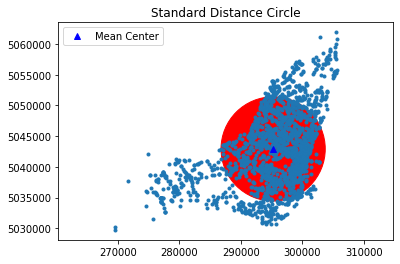

In [58]:
# Écart-type de la distance de chaque point par rapport au centre moyen
stdd = std_distance(pp.points)
print(stdd)
circle1=plt.Circle((mc[0], mc[1]),stdd,color='r')
ax = pp10.plot(get_ax=True, title='Standard Distance Circle')
ax.add_artist(circle1)
plt.plot(mc[0], mc[1], 'b^', label='Mean Center')
ax.set_aspect('equal')
plt.legend(numpoints=1)
plt.axis('equal')

6331.511535676762 6332.882098141973 0.7771320793044179


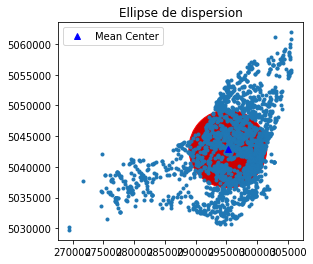

In [50]:
# Ellipse de dispersion
sx, sy, theta = ellipse(pp.points)
print(sx, sy, theta)
from matplotlib.patches import Ellipse
#fig, ax = plt.subplots(1, figsize = (10,10))
ax = pp10.plot(title='Ellipse de dispersion', get_ax = True)
e = Ellipse(xy=mean_center(pp.points), width=sx*2, height=sy*2, angle=-theta*180./np.pi) #angle is rotation in degrees (anti-clockwise)
ax.add_artist(e)
e.set_clip_box(ax.bbox)
e.set_facecolor([0.8,0,0])
e.set_edgecolor([1,0,0])
#ax.set_xlim(0,100)
#ax.set_ylim(0,100)
ax.set_aspect('equal')
plt.plot(mc[0], mc[1], 'b^', label='Mean Center')
plt.legend(numpoints=1)

6305.511886897116 6305.925865098324 0.7808760074965077
6299.217955088283 6316.435086531287 0.8141539534866549
6341.16982572868 6377.867721712437 0.7437836651348569
6337.333859456525 6341.081260827211 0.7985230647580354
6353.401124279784 6379.833927414526 0.74725532801942
6387.876179758507 6415.445726323321 0.7477882168974419
6187.925652282718 6201.1040432513655 0.7592878389799966
6467.9549124213745 6479.051841846826 0.8100659767591732
6394.816100059358 6397.663744256561 0.7737369258676113
6326.495297165079 6360.0756149970775 0.827294172033689
6201.756988783017 6218.2461708614965 0.7567367687889509
6315.043118745761 6319.757815036373 0.770538207937419


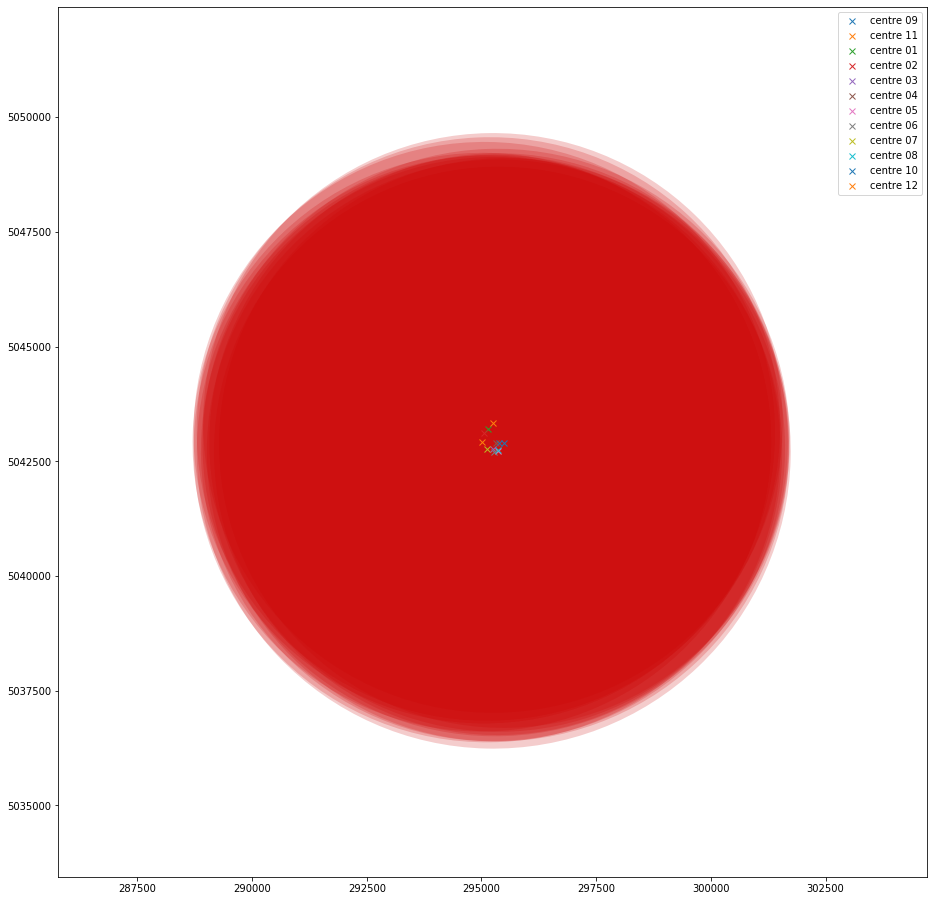

In [53]:
fig, ax = plt.subplots(1, figsize = (16,16))
for mois in accidents.MOIS.unique():
    points = accidents.loc[accidents.MOIS == mois, ['LOC_X','LOC_Y']]
    sx, sy, theta = ellipse(points)
    print(sx, sy, theta)
    c = mean_center(points)
    e = Ellipse(xy=c, width=sx*2, height=sy*2, angle=-theta*180./np.pi) #angle is rotation in degrees (anti-clockwise)
    ax.add_artist(e)
    e.set_clip_box(ax.bbox)
    e.set_facecolor([0.8,0,0])
    e.set_alpha(0.2)
    plt.plot(c[0], c[1], 'x',label='centre '+mois)
ax.set_xlim(mc[0]-1.5*sx,mc[0]+1.5*sx)
ax.set_ylim(mc[1]-1.5*sy,mc[1]+1.5*sy)
ax.set_aspect('equal')
#plt.plot(mc[0], mc[1], 'b^', label='Mean Center')
plt.legend()

[[ 268161.55812 5031884.5624 ]
 [ 269196.26049 5029489.2959 ]
 [ 269542.71901 5029358.     ]
 [ 269642.5025  5029325.1705 ]
 [ 295279.504   5030599.774  ]
 [ 295965.844   5030716.     ]
 [ 296201.77994 5030777.3172 ]
 [ 300977.36554 5034486.8432 ]
 [ 301434.531   5035172.871  ]
 [ 302078.459   5036587.127  ]
 [ 305561.436   5055567.513  ]
 [ 305739.934   5056567.26   ]
 [ 306077.46146 5062512.1035 ]
 [ 304138.456   5062121.259  ]
 [ 274023.12652 5041829.4849 ]
 [ 273689.42659 5041354.562  ]
 [ 269225.8437  5033754.4181 ]] (268161.55812, 5029325.1705, 306077.46146, 5062512.1035)


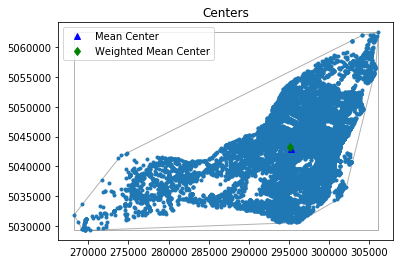

In [56]:
print(hull(pp.points), mbr(pp.points))
pp.plot(title='Centers', hull=True, window = True ) #plot point pattern "pp" as well as its convex hull
plt.plot(mc[0], mc[1], 'b^', label='Mean Center')
plt.plot(wmc[0], wmc[1], 'gd', label='Weighted Mean Center')
plt.legend()

# 